Equação de Calor, Apresentação 16

Faça uma simulação

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

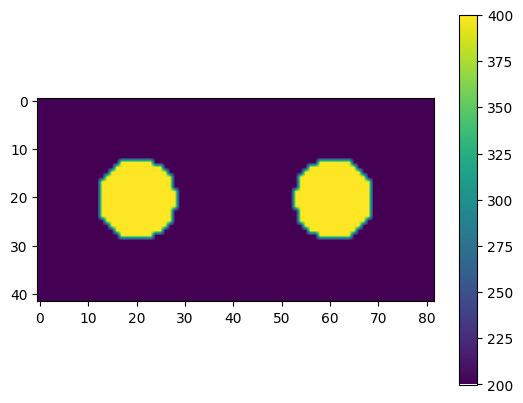

In [ ]:
Lx = 2
Ly = 1
Nx = 80
Ny = 40

hx = Lx/(Nx+1)
hy = Ly/(Ny+1)

Tf = 2.6
ht = min(0.5*hx*hx,0.5*hy*hy)*0.9
Nt = (int)(Tf/ht)

T = np.zeros((Ny+2,Nx+2,Nt+1))

alpha = 15e-4
sx = alpha*ht/hx/hx
sy = alpha*ht/hy/hy

# Initial condition
for j in range(0,Ny+2):
    for i in range(0,Nx+2):
        xi,yi = i*hx, j*hy
        T[j,i,0] = 200
        if ((xi-0.5)**2+(yi-0.5)**2<0.2*0.2) or ((xi-1.5)**2+(yi-0.5)**2<0.2*0.2):
            T[j,i,0] = 400

plt.imshow(T[:,:,0], interpolation='bilinear')
plt.colorbar()

In [ ]:
for n in range(Nt):
    T[0,:,n+1] = 200
    T[Ny+1,:,n+1] = 200
    T[:,0,n+1] = 200
    T[:,Nx+1,n+1] = 200

    for j in range(1,Ny+1):
        for i in range(1,Nx+1):
            T[j,i,n+1] = sx*T[j,i+1,n] + sx*T[j,i-1,n]+ sy*T[j+1,i,n] + sy*T[j-1,i,n] + (1-2*sx-2*sy)*T[j,i,n]

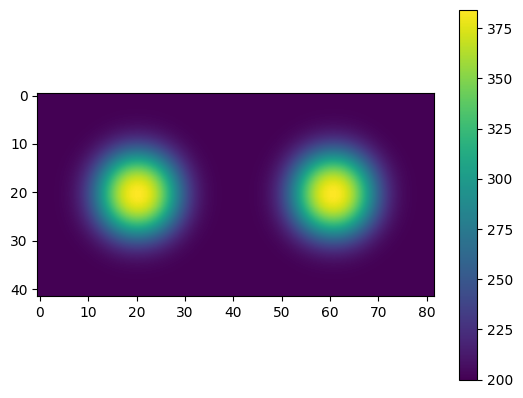

In [ ]:
plt.imshow(T[:,:,-1], interpolation='bilinear')
plt.colorbar()

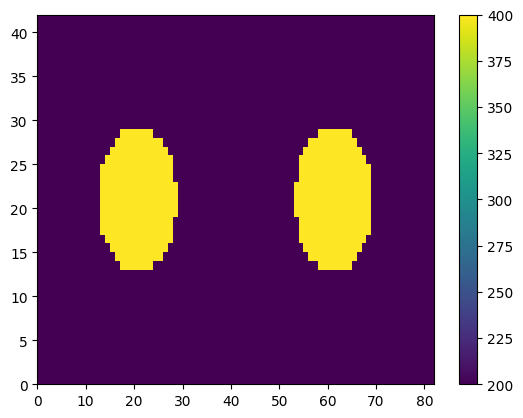

In [ ]:
fig = plt.figure()
def plotheatmap(u_k, k):
    plt.clf()

    plt.pcolormesh(u_k)
    plt.colorbar()

    return plt

def animate(k):
    plotheatmap(T[:,:,k*100], k)

anim = animation.FuncAnimation(fig=fig, func=animate, interval=30, frames=98)
HTML(anim.to_html5_video())